## Groceries EDA 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('sample_sales_data.csv')

In [21]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [22]:
df.shape

(7829, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [24]:
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [25]:
df.isna().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [26]:
df['transaction_id'].nunique()

7829

#### Not useful unique values

In [27]:
df.drop(['Unnamed: 0','transaction_id'],axis=1,inplace=True)

#### No null values

In [28]:
df.dtypes.sort_values()

quantity           int64
unit_price       float64
total            float64
timestamp         object
product_id        object
category          object
customer_type     object
payment_type      object
dtype: object

In [29]:
dtypes_list = df.dtypes.sort_values().index.to_list()
dtypes_list

['quantity',
 'unit_price',
 'total',
 'timestamp',
 'product_id',
 'category',
 'customer_type',
 'payment_type']

In [30]:
df_numerical = dtypes_list[0:4]
df_numerical

['quantity', 'unit_price', 'total', 'timestamp']

In [31]:
df_categorical = dtypes_list[4:]
df_categorical

['product_id', 'category', 'customer_type', 'payment_type']

In [32]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

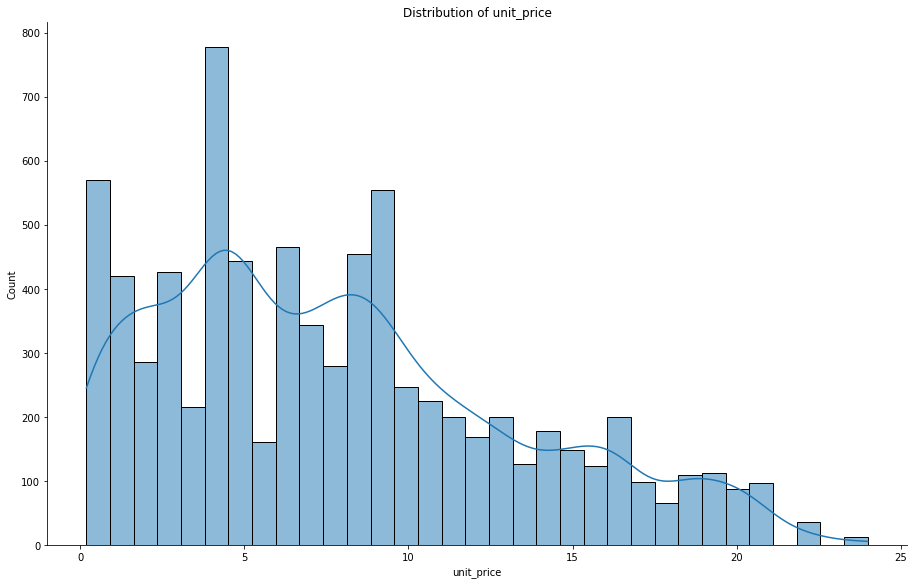

In [33]:
plot_continuous_distribution(df, 'unit_price')

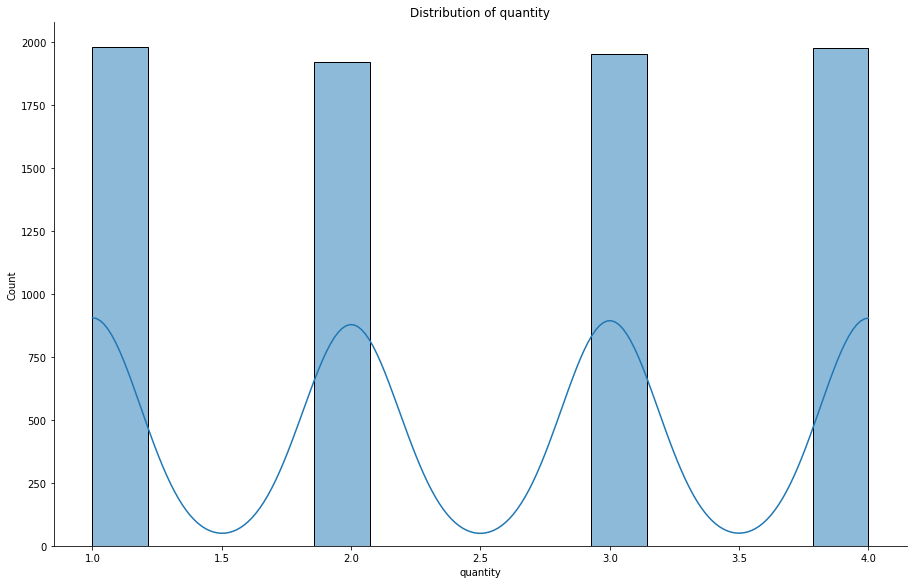

In [34]:
plot_continuous_distribution(df, 'quantity')

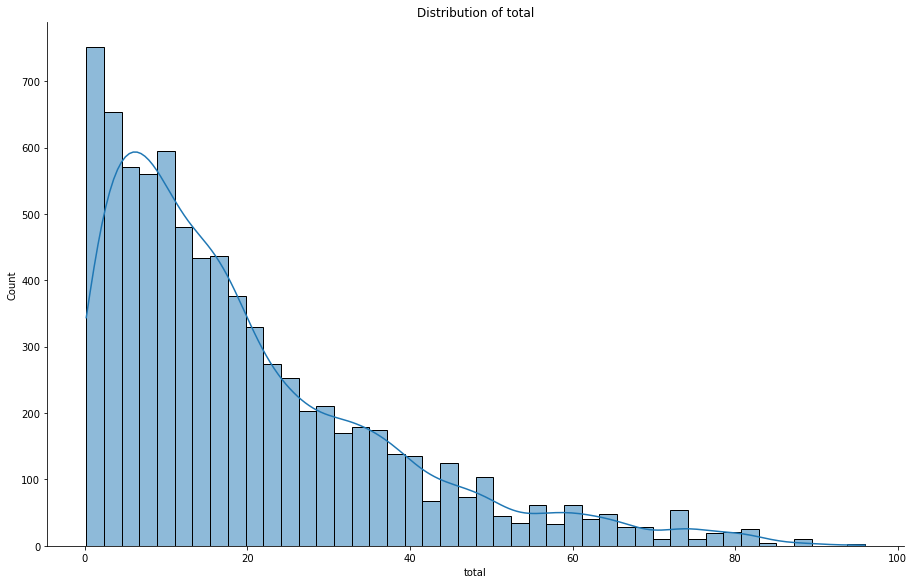

In [35]:
plot_continuous_distribution(df, 'total')

In [37]:
df.category.value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
frozen                   263
snacks                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

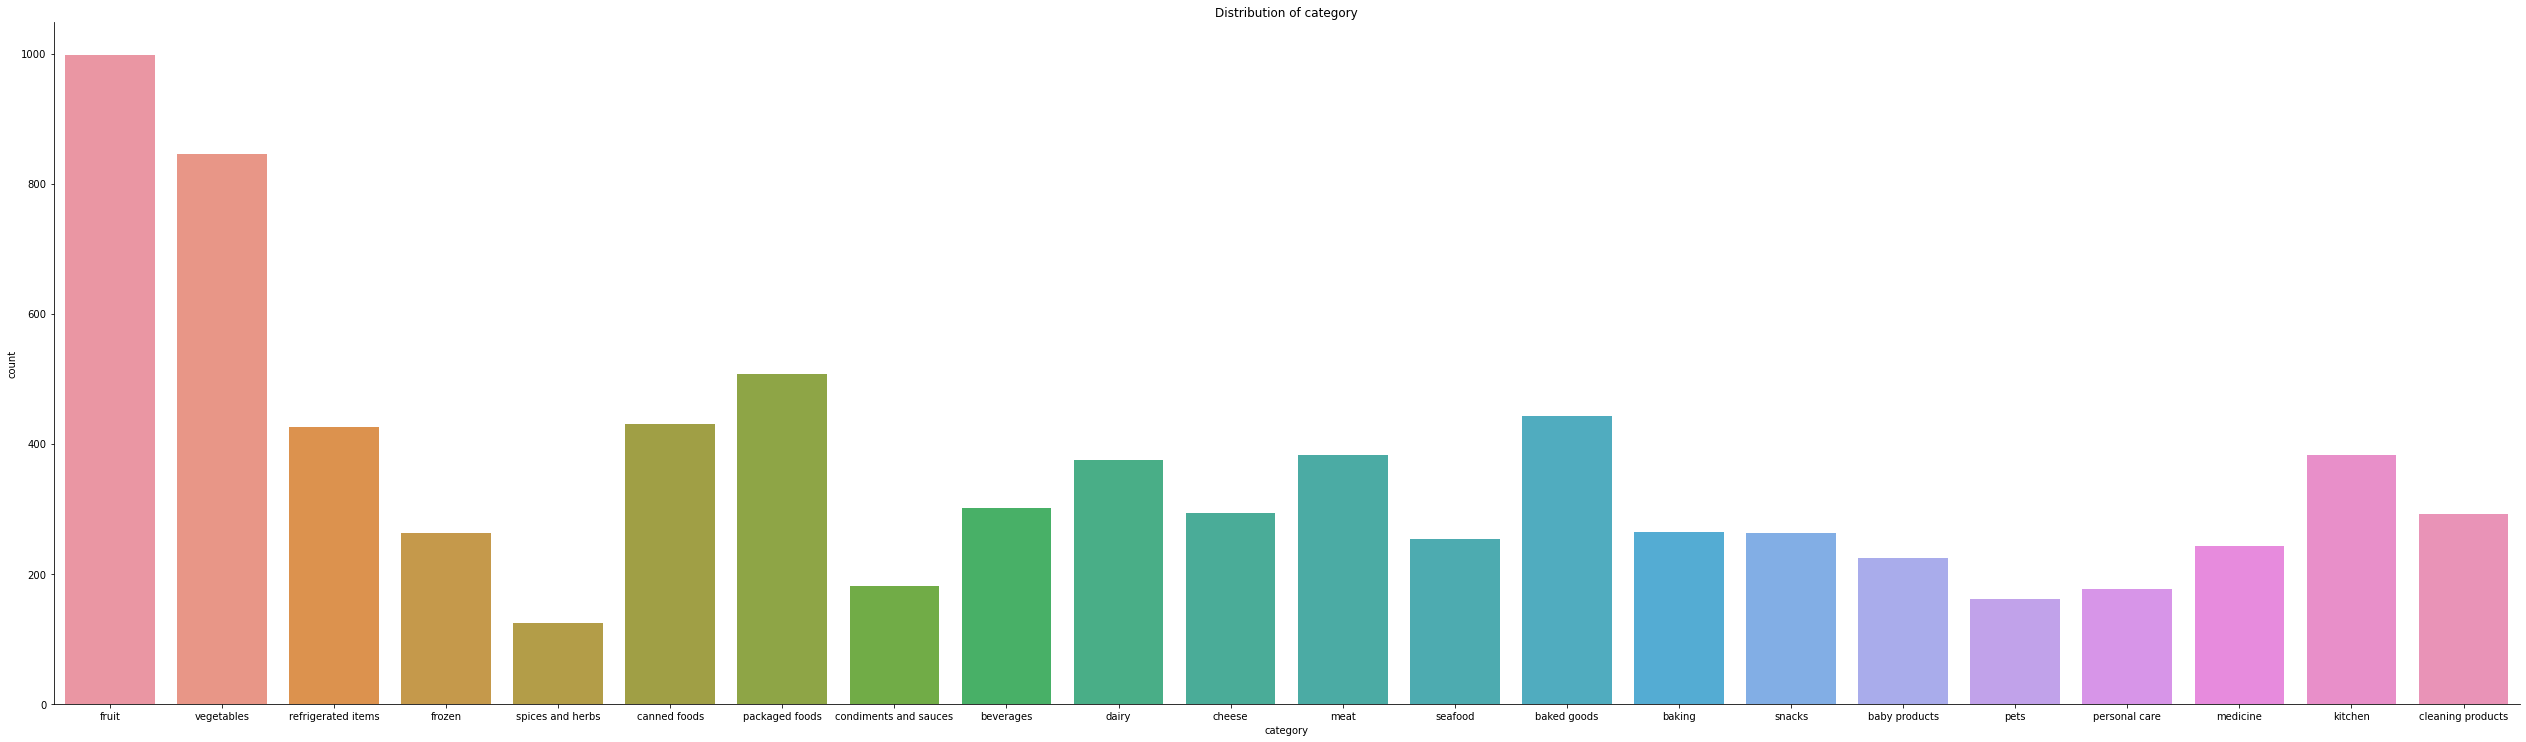

In [36]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

In [38]:
df.product_id.value_counts()

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64

#### No need to plot product_id, large number of unique values

In [39]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [40]:
df = convert_to_datetime(df, 'timestamp')

In [45]:
df.dtypes

timestamp        datetime64[ns]
product_id               object
category                 object
customer_type            object
unit_price              float64
quantity                  int64
total                   float64
payment_type             object
dtype: object

In [49]:
df['day'] = df['timestamp'].dt.day

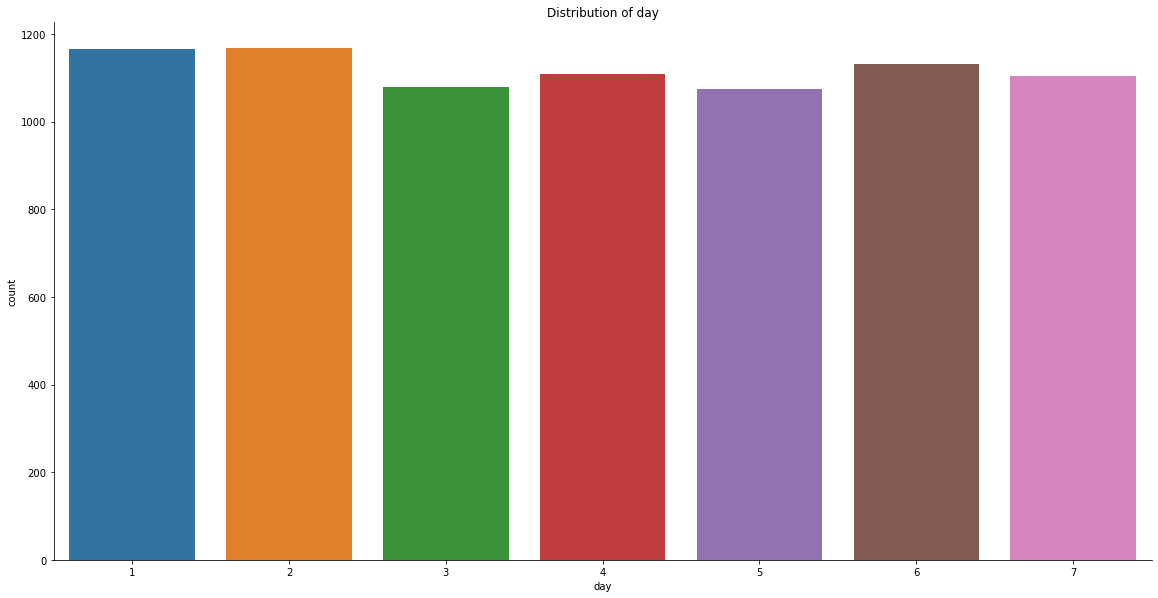

In [50]:
plot_categorical_distribution(df,'day')

In [51]:
df['hour'] = df['timestamp'].dt.hour

In [52]:
df.hour.value_counts()

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64

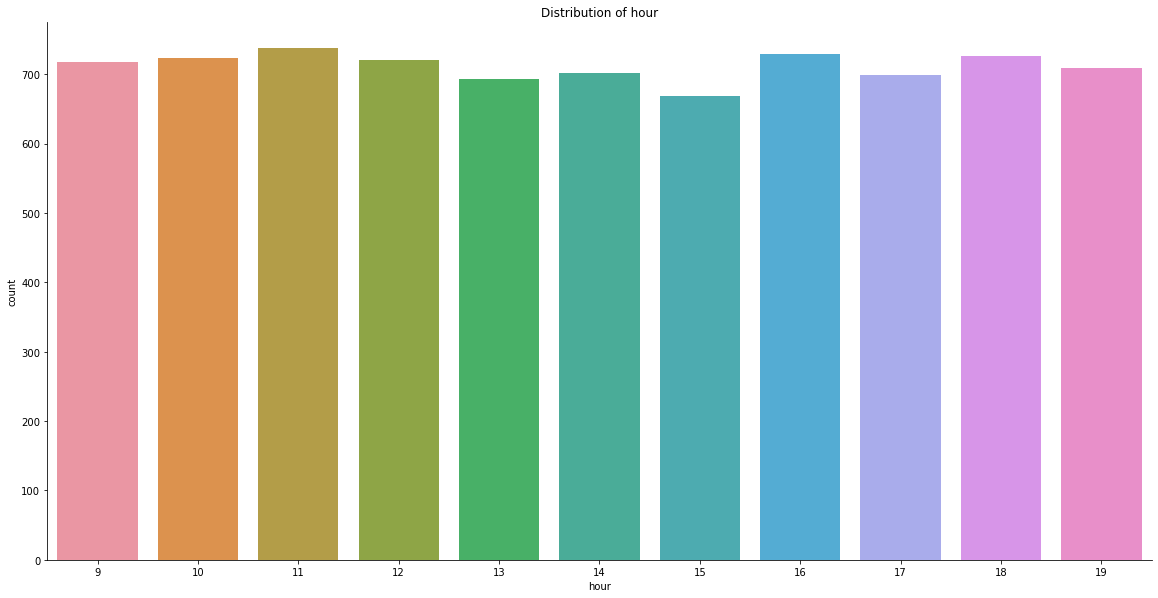

In [53]:
plot_categorical_distribution(df,'hour')

In [54]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total,day,hour
unit_price,1.000000,0.024588,0.792018,0.026421,0.010842
quantity,0.024588,1.000000,0.521926,-0.002321,-0.008410
total,0.792018,0.521926,1.000000,0.016510,0.010354
day,0.026421,-0.002321,0.016510,1.000000,0.008665
hour,0.010842,-0.008410,0.010354,0.008665,1.000000


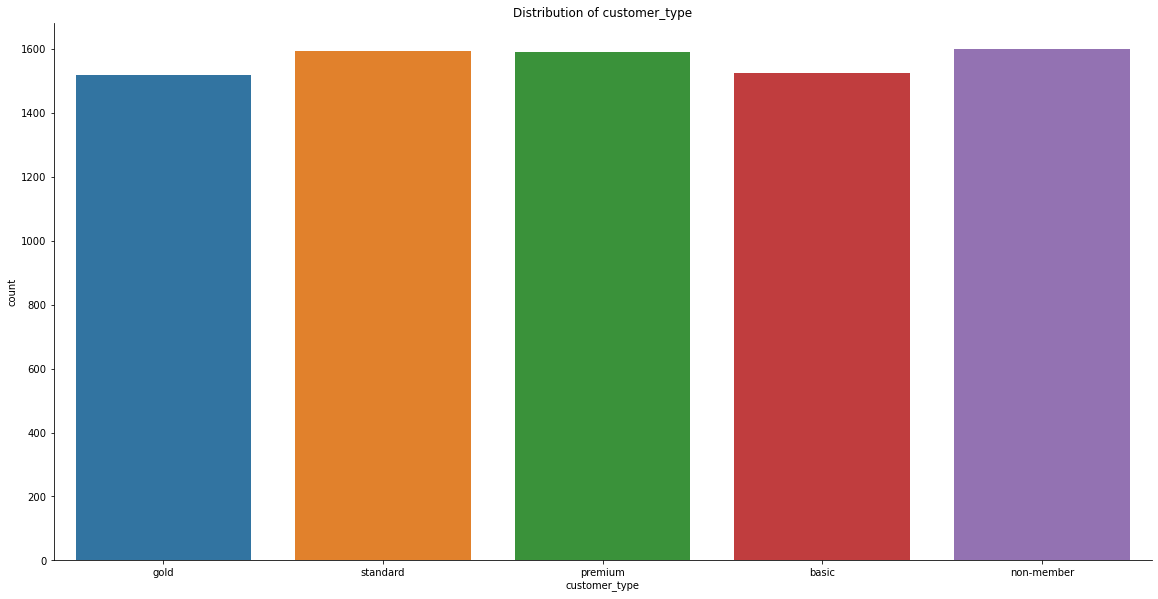

In [55]:
plot_categorical_distribution(df,'customer_type')

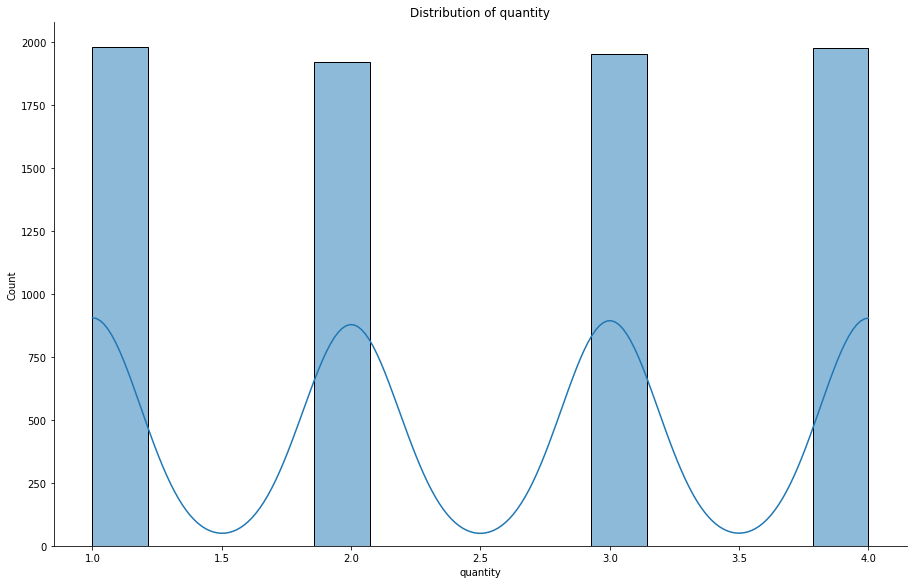